In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Puesta en marcha de los datos de entrenamiento

In [3]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


## Creación del modelo

In [9]:
L0 = tf.keras.layers.Dense(units=1, input_shape=[1])

input_shape=[1] — This specifies that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degrees Celsius.

units=1 — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final layer, it is also the size of the model's output — a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the layer would need to match the input_shape of the next layer.)

In [10]:
L0

<Dense name=dense_2, built=False>

In [11]:
model = tf.keras.Sequential([L0])

## Compila el modelo

In [12]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

## Entrena el modelo

In [14]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=True)
print("Finished training the model")

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 8.7943
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.6773
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.5617
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.4474
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 8.3346
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 8.2231
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.1130
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.0043
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.8968
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.7907
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.6859
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.5824
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.4801
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 7.3791
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.2794
Epoch 16/500
1/1 ━━

This cycle of calculate, compare, adjust is controlled by the fit method. 
* The **first** argument is the inputs, the **second** argument is the desired outputs. 
* The **epochs** argument specifies how many times this cycle should be run, and the **verbose** argument controls how much output the method produces.

## Dibuja las estadísticas de entrenamiento

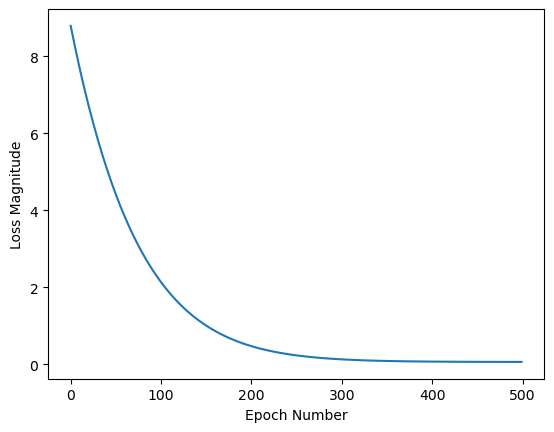

In [15]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

## Usar el modelo para predecir

In [16]:
print(model.predict(np.array([100])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[211.74275]]


### The correct answer is  100×1.8+32=212 , so our model is doing really well.

## Los pesos de las capas

In [17]:
print("These are the layer variables: {}".format(L0.get_weights()))

These are the layer variables: [array([[1.7982279]], dtype=float32), array([31.919962], dtype=float32)]


## Un experimento

In [18]:
L0 = tf.keras.layers.Dense(units=4, input_shape=[1]) # 4 neuronas
L1 = tf.keras.layers.Dense(units=4) # 4 neuronas
L2 = tf.keras.layers.Dense(units=1) # 1 neurona

model = tf.keras.Sequential([L0, L1, L2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict(np.array([100.0])))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict(np.array([100.0]))))
print("These are the L0 variables: {}".format(L0.get_weights()))
print("These are the L1 variables: {}".format(L1.get_weights()))
print("These are the L2 variables: {}".format(L2.get_weights()))

C:\Users\ftorr\anaconda3\envs\NuevoAmbiente\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Finished training the model
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[211.74744]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Model predicts that 100 degrees Celsius is: [[211.74744]] degrees Fahrenheit
These are the L0 variables: [array([[ 0.16500303, -0.35202527, -0.51697624, -0.127266  ]],
      dtype=float32), array([-2.4404383, -3.1300297, -2.9101572,  1.971749 ], dtype=float32)]
These are the L1 variables: [array([[-0.14542012, -0.13381548, -0.4426567 ,  0.9226578 ],
       [-0.5367667 ,  0.97023267, -1.3045725 , -0.14615904],
       [-1.0903064 , -0.08266124, -1.3623244 ,  0.7857835 ],
       [-0.04596457, -0.35315615,  0.23188561, -0.96974176]],
      dtype=float32), array([ 3.2290049, -2.239249 ,  3.2294025, -3.2365634], dtype=float32)]
These are the L2 variables: [array([[ 0.72621816],
       [-0.2701724 ],
       [ 1.0577273 ],
       [-0.8566329 ]], dtype=float32), array([2.9699275], dtype=float32)]


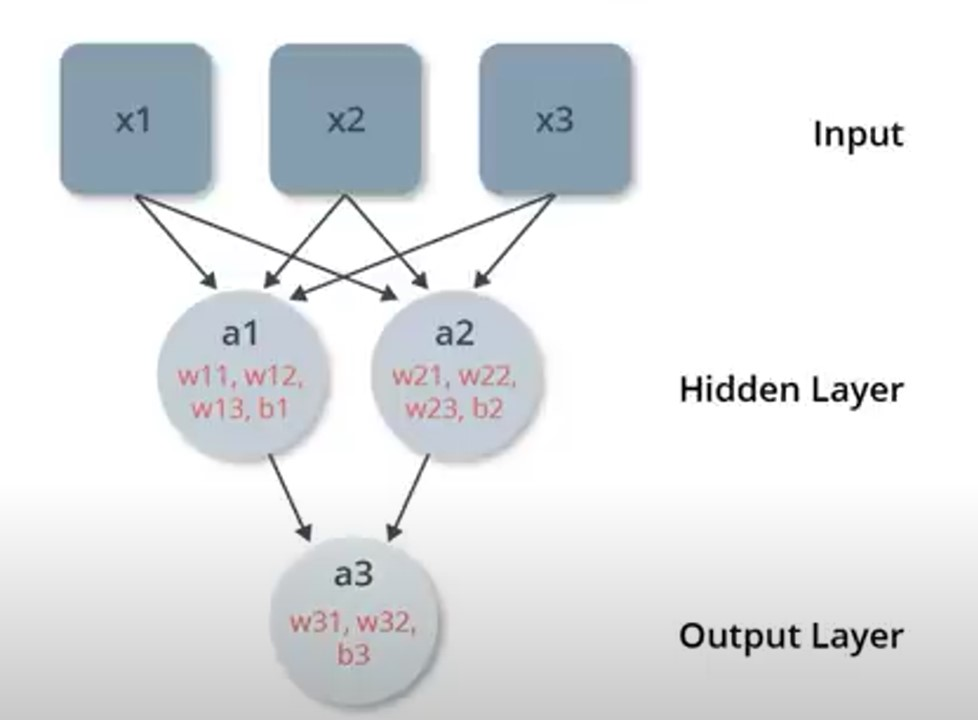

In [19]:
from IPython.display import Image
Image(filename='../python-ml-course/notebooks/resources/RedNeuronal.jpg')

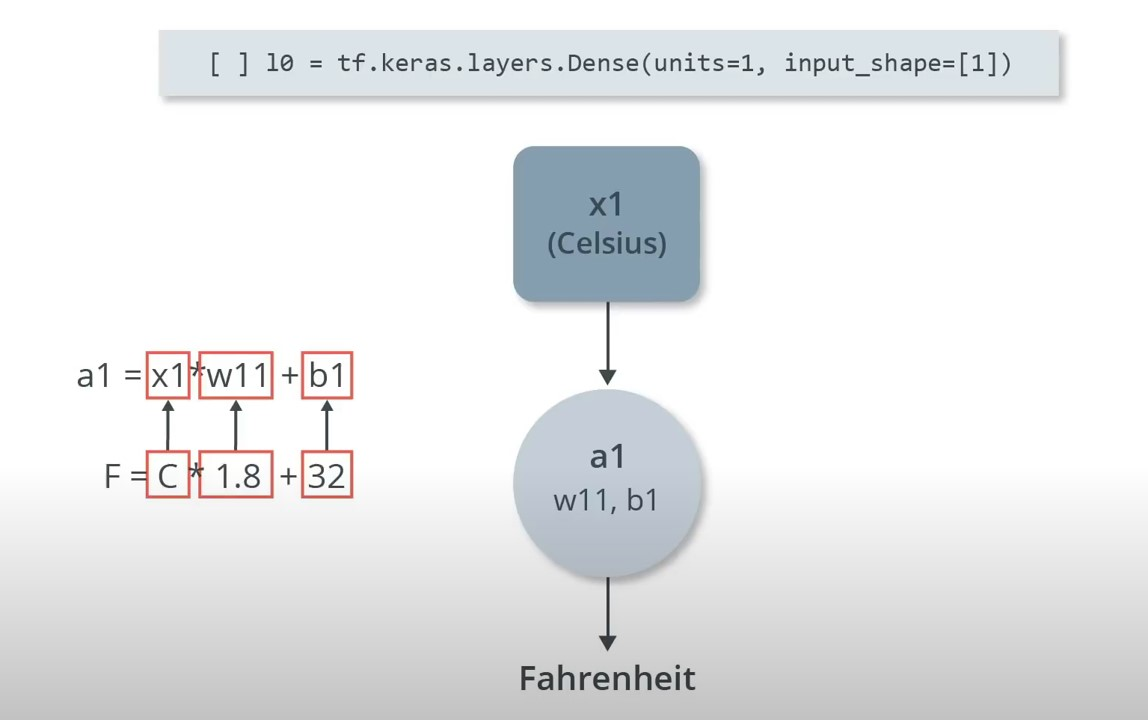

In [20]:
Image(filename='../python-ml-course/notebooks/resources/RedNeuronal2.jpg')